<a href="https://colab.research.google.com/github/Pinky-1997/HomeLoan_Prediction/blob/main/HomeLoan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOME LOAN DEFAULT**





In [36]:
# import necessary libraries and load the dataset
import pandas as pd
import numpy as np
application_train = pd.read_csv('application_train.csv')


In [37]:
# Display the first few rows of the dataset

application_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Prints the information of our dataset
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42726 entries, 0 to 42725
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(101), int64(5), object(16)
memory usage: 39.8+ MB


In [39]:
# Provides descriptive analysis of dataset
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,42726.000000,42726.000000,42726.000000,4.272600e+04,4.272600e+04,42726.000000,4.269100e+04,42726.000000,42726.000000,42726.000000,...,42725.000000,42725.000000,42725.000000,42725.000000,36984.000000,36984.000000,36984.000000,36984.000000,36984.000000,36984.000000
mean,124812.317886,0.080794,0.417732,1.710705e+05,5.996176e+05,27131.323726,5.388428e+05,0.020781,-16035.308056,63628.676286,...,0.008332,0.000679,0.000538,0.000398,0.007382,0.007679,0.032798,0.271361,0.259950,1.882084
std,14271.195236,0.272522,0.723853,5.737618e+05,4.018667e+05,14619.331322,3.692702e+05,0.013780,4358.233973,141143.649732,...,0.090902,0.026044,0.023196,0.019944,0.089913,0.110285,0.194926,0.934554,0.606788,1.860933
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25182.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112442.250000,0.000000,0.000000,1.125000e+05,2.700000e+05,16501.500000,2.385000e+05,0.010006,-19656.750000,-2788.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,124889.500000,0.000000,0.000000,1.440000e+05,5.175000e+05,24939.000000,4.500000e+05,0.018850,-15756.500000,-1220.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,137157.750000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12397.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,149462.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


In [40]:
# Check for missing values
application_train.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     5742
AMT_REQ_CREDIT_BUREAU_WEEK    5742
AMT_REQ_CREDIT_BUREAU_MON     5742
AMT_REQ_CREDIT_BUREAU_QRT     5742
AMT_REQ_CREDIT_BUREAU_YEAR    5742
Length: 122, dtype: int64

In [41]:
# Fill missing values with mean for numerical columns and mode for categorical columns
for col in application_train.columns:
    if application_train[col].dtype == 'object':
        application_train[col].fillna(application_train[col].mode()[0], inplace=True)
    else:
        application_train[col].fillna(application_train[col].mean(), inplace=True)


In [42]:
# Convert categorical variables to numerical

from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
for col in application_train.columns:
    if application_train[col].dtype == 'object':
        application_train[col] = le.fit_transform(application_train[col])


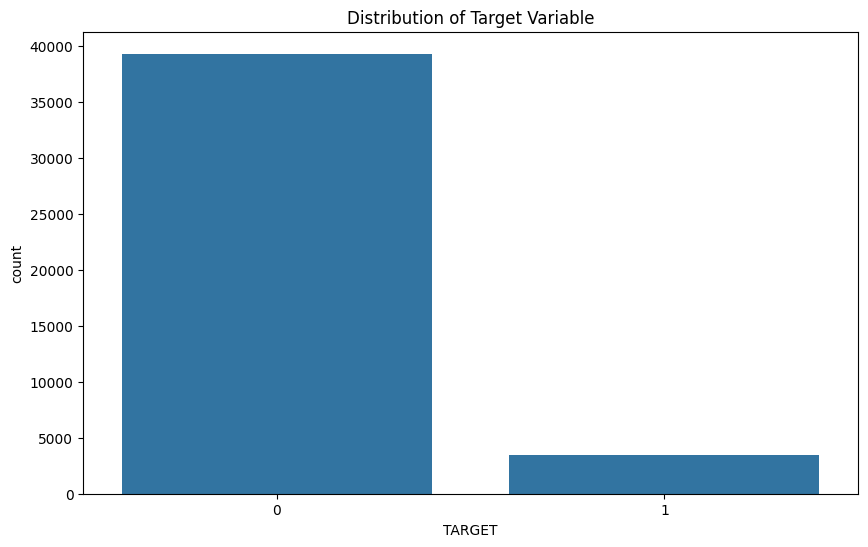

In [43]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='TARGET', data=application_train)
plt.title('Distribution of Target Variable')
plt.show()

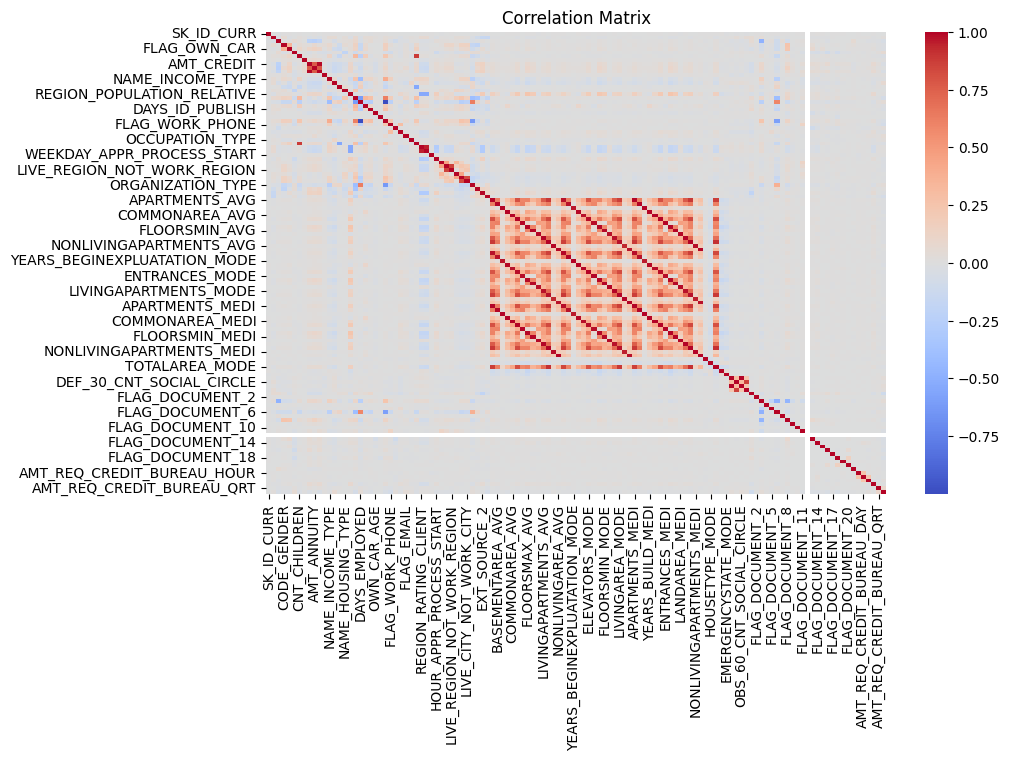

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(application_train.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [23]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [24]:
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [25]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18067780 entries, 0 to 18067779
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 413.5+ MB


In [27]:
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')
pos_cash_balance.head()


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0.0,0.0
1,1715348,367990,-33,36.0,35.0,Active,0.0,0.0
2,1784872,397406,-32,12.0,9.0,Active,0.0,0.0
3,1903291,269225,-35,48.0,42.0,Active,0.0,0.0
4,2341044,334279,-35,36.0,35.0,Active,0.0,0.0


In [28]:
pos_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347629 entries, 0 to 2347628
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 float64
 7   SK_DPD_DEF             float64
dtypes: float64(4), int64(3), object(1)
memory usage: 143.3+ MB


In [29]:
credit_card_balance = pd.read_csv('credit_card_balance.csv')
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1.0,0.0,1.0,35.0,Active,0.0,0.0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1.0,0.0,0.0,69.0,Active,0.0,0.0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0.0,0.0,0.0,30.0,Active,0.0,0.0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1.0,0.0,0.0,10.0,Active,0.0,0.0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1.0,0.0,1.0,101.0,Active,0.0,0.0


In [30]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841209 entries, 0 to 841208
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_PREV                  841209 non-null  int64  
 1   SK_ID_CURR                  841209 non-null  int64  
 2   MONTHS_BALANCE              841209 non-null  int64  
 3   AMT_BALANCE                 841209 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     841209 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    667117 non-null  float64
 6   AMT_DRAWINGS_CURRENT        841209 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  667117 non-null  float64
 8   AMT_DRAWINGS_POS_CURRENT    667117 non-null  float64
 9   AMT_INST_MIN_REGULARITY     780181 non-null  float64
 10  AMT_PAYMENT_CURRENT         664372 non-null  float64
 11  AMT_PAYMENT_TOTAL_CURRENT   841208 non-null  float64
 12  AMT_RECEIVABLE_PRINCIPAL    841208 non-null  float64
 13  AMT_RECIVABLE 

In [31]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275072 entries, 0 to 275071
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   275072 non-null  int64  
 1   SK_ID_CURR                   275072 non-null  int64  
 2   NAME_CONTRACT_TYPE           275072 non-null  object 
 3   AMT_ANNUITY                  215293 non-null  float64
 4   AMT_APPLICATION              275072 non-null  float64
 5   AMT_CREDIT                   275072 non-null  float64
 6   AMT_DOWN_PAYMENT             132011 non-null  float64
 7   AMT_GOODS_PRICE              213485 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   275072 non-null  object 
 9   HOUR_APPR_PROCESS_START      275072 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  275072 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       275072 non-null  int64  
 12  RATE_DOWN_PAYMENT            132011 non-null  float64
 13 

In [33]:
installments_payments = pd.read_csv('installments_payments.csv')
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674.0,1.0,6.0,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639.0,0.0,34.0,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053.0,2.0,1.0,-63.0,-63.0,25425.000,25425.000
3,2452527,199697.0,1.0,3.0,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756.0,1.0,2.0,-1383.0,-1366.0,2165.040,2160.585


In [34]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736093 entries, 0 to 1736092
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              float64
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   float64
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(7), int64(1)
memory usage: 106.0 MB


In [46]:
# Aggregating bureau data
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'DAYS_CREDIT': ['mean', 'max'],
    'CREDIT_DAY_OVERDUE': ['sum'],
    'AMT_CREDIT_MAX_OVERDUE': ['mean']
})
bureau_agg.columns = ['_'.join(col) for col in bureau_agg.columns]
application_train = application_train.join(bureau_agg, on='SK_ID_CURR', how='left', rsuffix='_bureau')

# Aggregating bureau balance data
bureau_balance_agg = bureau_balance.groupby('SK_ID_BUREAU').agg({
    'MONTHS_BALANCE': ['mean', 'max'],
    'STATUS': ['sum']
})
bureau_balance_agg.columns = ['_'.join(col) for col in bureau_balance_agg.columns]
bureau = bureau.join(bureau_balance_agg, on='SK_ID_BUREAU', how='left', rsuffix='_bureau_balance')
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE_mean': ['mean'],
    'MONTHS_BALANCE_max': ['max'],
    'STATUS_sum': ['sum']
})
bureau_agg.columns = ['_'.join(col) for col in bureau_agg.columns]
application_train = application_train.join(bureau_agg, on='SK_ID_CURR', how='left', rsuffix='_bureau_balance')

# Aggregating POS CASH balance data
pos_cash_balance_agg = pos_cash_balance.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['mean', 'max'],
    'CNT_INSTALMENT': ['mean'],
    'SK_DPD': ['sum']
})
pos_cash_balance_agg.columns = ['_'.join(col) for col in pos_cash_balance_agg.columns]
application_train = application_train.join(pos_cash_balance_agg, on='SK_ID_CURR', how='left', rsuffix='_pos_cash')

# Aggregating credit card balance data
credit_card_balance_agg = credit_card_balance.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['mean', 'max'],
    'AMT_BALANCE': ['mean'],
    'SK_DPD': ['sum']
})
credit_card_balance_agg.columns = ['_'.join(col) for col in credit_card_balance_agg.columns]
application_train = application_train.join(credit_card_balance_agg, on='SK_ID_CURR', how='left', rsuffix='_credit_card')

# Aggregating previous application data
previous_application_agg = previous_application.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['mean'],
    'AMT_CREDIT': ['mean'],
    'NAME_CONTRACT_STATUS': ['count']
})
previous_application_agg.columns = ['_'.join(col) for col in previous_application_agg.columns]
application_train = application_train.join(previous_application_agg, on='SK_ID_CURR', how='left', rsuffix='_previous_app')

# Aggregating installments payments data
installments_payments_agg = installments_payments.groupby('SK_ID_CURR').agg({
    'NUM_INSTALMENT_VERSION': ['mean'],
    'AMT_INSTALMENT': ['mean'],
    'AMT_PAYMENT': ['mean']
})
installments_payments_agg.columns = ['_'.join(col) for col in installments_payments_agg.columns]
application_train = application_train.join(installments_payments_agg, on='SK_ID_CURR', how='left', rsuffix='_installments')


In [49]:
# Merged dataset column names
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'MONTHS_BALANCE_mean_credit_card', 'MONTHS_BALANCE_max_credit_card',
       'AMT_BALANCE_mean', 'SK_DPD_sum_credit_card', 'AMT_APPLICATION_mean',
       'AMT_CREDIT_mean', 'NAME_CONTRACT_STATUS_count',
       'NUM_INSTALMENT_VERSION_mean', 'AMT_INSTALMENT_mean',
       'AMT_PAYMENT_mean'],
      dtype='object', length=154)

In [50]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,MONTHS_BALANCE_mean_credit_card,MONTHS_BALANCE_max_credit_card,AMT_BALANCE_mean,SK_DPD_sum_credit_card,AMT_APPLICATION_mean,AMT_CREDIT_mean,NAME_CONTRACT_STATUS_count,NUM_INSTALMENT_VERSION_mean,AMT_INSTALMENT_mean,AMT_PAYMENT_mean
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.090909,13237.408636,13237.408636
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.066667,75814.854000,75814.854000
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5357.250000,5357.250000
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,-2.666667,-1.0,0.0,0.0,675000.0,675000.0,1.0,1.285714,114142.133571,114142.133571
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,202500.0,232200.0,2.0,1.148148,13830.458333,13830.338333


In [51]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42726 entries, 0 to 42725
Columns: 154 entries, SK_ID_CURR to AMT_PAYMENT_mean
dtypes: float64(131), int64(21), object(2)
memory usage: 50.2+ MB


In [52]:
application_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
                               ...  
AMT_CREDIT_mean                22612
NAME_CONTRACT_STATUS_count     22612
NUM_INSTALMENT_VERSION_mean     2471
AMT_INSTALMENT_mean             2471
AMT_PAYMENT_mean                2471
Length: 154, dtype: int64

In [54]:
# Drop columns with a high percentage of missing values
threshold = 0.4
application_train.dropna(thresh=int(threshold * application_train.shape[0]), axis=1, inplace=True)
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,MONTHS_BALANCE_mean_pos_cash,MONTHS_BALANCE_max_pos_cash,CNT_INSTALMENT_mean_pos_cash,SK_DPD_sum_pos_cash,AMT_APPLICATION_mean,AMT_CREDIT_mean,NAME_CONTRACT_STATUS_count,NUM_INSTALMENT_VERSION_mean,AMT_INSTALMENT_mean,AMT_PAYMENT_mean
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,-15.666667,-13.0,24.000000,0.0,NaN,NaN,NaN,1.090909,13237.408636,13237.408636
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,-49.571429,-23.0,11.142857,0.0,NaN,NaN,NaN,1.066667,75814.854000,75814.854000
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,-25.000000,-25.0,4.000000,0.0,NaN,NaN,NaN,1.000000,5357.250000,5357.250000
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,-14.000000,-5.0,7.500000,0.0,675000.0,675000.0,1.0,1.285714,114142.133571,114142.133571
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,-26.315789,-3.0,17.578947,0.0,202500.0,232200.0,2.0,1.148148,13830.458333,13830.338333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42721,149458,0,0,0,0,1,0,197433.0,1350000.0,34128.0,...,-12.000000,-12.0,2.000000,0.0,376569.0,338908.5,1.0,4.000000,145460.970000,145460.970000
42722,149459,0,0,0,0,1,0,382500.0,820638.0,59337.0,...,-26.789474,-6.0,19.157895,0.0,NaN,NaN,NaN,0.441558,20190.735584,16590.451558
42723,149460,0,0,1,0,0,0,157500.0,545040.0,36423.0,...,-8.000000,-5.0,12.000000,0.0,NaN,NaN,NaN,0.187500,4956.037031,4893.969375
42724,149461,0,0,1,1,1,0,135000.0,1350000.0,35613.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Handling missing values in the main dataset

def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    return df

application_train = fill_missing_values(application_train)

In [56]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,MONTHS_BALANCE_mean_pos_cash,MONTHS_BALANCE_max_pos_cash,CNT_INSTALMENT_mean_pos_cash,SK_DPD_sum_pos_cash,AMT_APPLICATION_mean,AMT_CREDIT_mean,NAME_CONTRACT_STATUS_count,NUM_INSTALMENT_VERSION_mean,AMT_INSTALMENT_mean,AMT_PAYMENT_mean
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,-15.666667,-13.000000,24.000000,0.000000,163920.780817,182866.608181,1.609128,1.090909,13237.408636,13237.408636
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,-49.571429,-23.000000,11.142857,0.000000,163920.780817,182866.608181,1.609128,1.066667,75814.854000,75814.854000
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,-25.000000,-25.000000,4.000000,0.000000,163920.780817,182866.608181,1.609128,1.000000,5357.250000,5357.250000
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,-14.000000,-5.000000,7.500000,0.000000,675000.000000,675000.000000,1.000000,1.285714,114142.133571,114142.133571
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,-26.315789,-3.000000,17.578947,0.000000,202500.000000,232200.000000,2.000000,1.148148,13830.458333,13830.338333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42721,149458,0,0,0,0,1,0,197433.0,1350000.0,34128.0,...,-12.000000,-12.000000,2.000000,0.000000,376569.000000,338908.500000,1.000000,4.000000,145460.970000,145460.970000
42722,149459,0,0,0,0,1,0,382500.0,820638.0,59337.0,...,-26.789474,-6.000000,19.157895,0.000000,163920.780817,182866.608181,1.609128,0.441558,20190.735584,16590.451558
42723,149460,0,0,1,0,0,0,157500.0,545040.0,36423.0,...,-8.000000,-5.000000,12.000000,0.000000,163920.780817,182866.608181,1.609128,0.187500,4956.037031,4893.969375
42724,149461,0,0,1,1,1,0,135000.0,1350000.0,35613.0,...,-31.328195,-18.786909,15.992834,2.486961,163920.780817,182866.608181,1.609128,1.034954,18266.857243,18570.955984


In [57]:
application_train.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
                              ..
AMT_CREDIT_mean                0
NAME_CONTRACT_STATUS_count     0
NUM_INSTALMENT_VERSION_mean    0
AMT_INSTALMENT_mean            0
AMT_PAYMENT_mean               0
Length: 146, dtype: int64

In [61]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42726 entries, 0 to 42725
Columns: 146 entries, SK_ID_CURR to AMT_PAYMENT_mean
dtypes: float64(123), int64(21), object(2)
memory usage: 47.6+ MB


In [62]:
for col in application_train.columns:
    if application_train[col].dtype == 'object':
        application_train[col] = le.fit_transform(application_train[col])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [63]:
def convert_to_numeric(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(0)  # Replace any remaining NaNs
    return df

application_train = convert_to_numeric(application_train)


In [64]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42726 entries, 0 to 42725
Columns: 146 entries, SK_ID_CURR to AMT_PAYMENT_mean
dtypes: float64(125), int64(21)
memory usage: 47.6 MB


In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Split the data into training and testing sets
X = application_train.drop(['TARGET'], axis=1)
y = application_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [66]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



# Train and evaluate multiple models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

model_results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    model_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC: {roc_auc}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Model: Logistic Regression
Accuracy: 0.9190201279450773
Precision: 0.3783783783783784
Recall: 0.013605442176870748
F1 Score: 0.026266416510318948
ROC AUC: 0.737016215063028
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11789
           1       0.38      0.01      0.03      1029

    accuracy                           0.92     12818
   macro avg       0.65      0.51      0.49     12818
weighted avg       0.88      0.92      0.88     12818

Confusion Matrix:
[[11766    23]
 [ 1015    14]]


Model: Decision Tree
Accuracy: 0.8484162895927602
Precision: 0.12417763157894737
Recall: 0.1467444120505345
F1 Score: 0.13452115812917595
ROC AUC: 0.5282029804760264
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     11789
           1       0.12      0.15      0.13      1029

    accuracy                           0.85     12818
   macro avg       0.52      0.53      0.53     12818
weighted av

In [70]:
# Create a DataFrame to compare model performance
model_results_df = pd.DataFrame(model_results)
print(model_results_df)

# Identify the best model based on ROC AUC score
best_model_name = model_results_df.loc[model_results_df['ROC AUC'].idxmax()]['Model']
print(f"Best model based on ROC AUC: {best_model_name}")


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.919020   0.378378  0.013605  0.026266  0.737016
1        Decision Tree  0.848416   0.124178  0.146744  0.134521  0.528203
2        Random Forest  0.919878   1.000000  0.001944  0.003880  0.696970
3    Gradient Boosting  0.919176   0.440678  0.025267  0.047794  0.747677
4              XGBoost  0.916602   0.370130  0.055394  0.096365  0.716089
5       Neural Network  0.871275   0.158416  0.139942  0.148607  0.640150
Best model based on ROC AUC: Gradient Boosting
